# Il giro del mondo in 80 giorni

![title](Verne_Tour_du_Monde.jpg)

Per calcolare il percorso da Horton a Londra si sono utilizzati tre metodi: 
- algoritmo di Dijkstra da zero
- libreria networkx con due metodi basati su Dijkstra: per grafi generici e weighted (come specificato nel link sottostante)

Il percorso viene calcolato da Horton (città a Est più vicina a Londra) a Londra

https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html

Import del file di input e calcolo del grafo con networkx

In [1]:
import pandas as pd
import networkx as nx
path = 'C:\\Users\michele.lenato\Documents\MASTER-UNIMI\Lezioni\Python\progetto\input.xlsx'  # Inserire il path in cui è stato scaricato il file input del repo github
input_3 = pd.read_excel(path) 
del input_3['Unnamed: 0']
#calcolo grafo direzionato
input_for_dg = []
for i in range(input_3.shape[0]):
  input_for_dg.append(tuple(input_3.loc[i].values.tolist()))

DG = nx.DiGraph()
DG.add_weighted_edges_from(input_for_dg)

In [2]:
import matplotlib.pyplot as plt
degree=[]
for n in DG.nodes():
    degree.append(DG.out_degree(n))
deg = pd.DataFrame(degree, columns=['gradi'])
deg['degrees no'] = deg['gradi']  #duplicazione di colonna
raggruppamento = deg.groupby(['gradi']).count()
raggruppamento

,degrees no
gradi,
1,2
2,325
3,26242


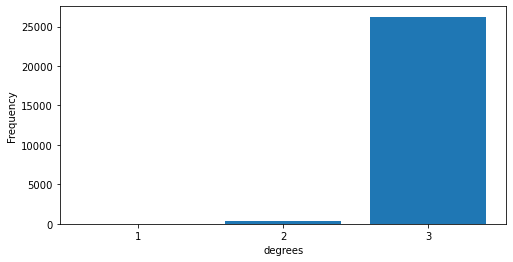

In [5]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=1)
import numpy as np
y = raggruppamento['degrees no']
x = raggruppamento.index.values
ax.bar(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('degrees')
plt.ylabel('Frequency')
plt.show()

Import dello sp calcolato con Dijkstra da zero

In [6]:
sp_dij_df = pd.read_excel('C:\\Users\michele.lenato\Documents\MASTER-UNIMI\Lezioni\Python\progetto\shortest_path_dijkstra.xlsx')
sp_dij = sp_dij_df['shortest_path_dijkstra'].tolist()
len(sp_dij) 

480

Calcolo dei due sp con Dijkstra con networkx sia per grafi generici sia per grafici weighted: DIFFERENZA TRA I DIJKSTRA = 8 NODI

In [7]:
sp = nx.shortest_path(DG, source=1826657058, target=1826645935) # Dijkstra per grafi generici  #Source: Horton, Target: London
sp_dij_nx = nx.dijkstra_path(DG, source=1826657058, target=1826645935) # Dijkstra per grafi weighted  #Source: Horton, Target: London
len(sp),len(sp_dij_nx)

(383, 472)

Differenza tra i due path dijkstra, da zero e con networkx con edit distance.
Si è visto che i due dijkstra differiscono in lunghezza di 8 nodi.
DIFFERENZA TOTALE = 32

In [8]:
import numpy as np 
def D(a, b):
    row = range(0, len(b)+1)
    col = range(0, len(a)+1)
    m = np.zeros((len(a)+1, len(b)+1))
    m[0,:] = row
    m[:,0] = col
    for i, x in enumerate(a):
        iM = i + 1
        for j, y in enumerate(b):
            jM = j + 1 
            if x == y:
                cost = 0
            else:
                cost = 1
            cost += min([
                m[iM-1,jM-1], 
                m[iM,jM-1]+(1-cost),
                m[iM-1,jM]+(1-cost),
            ])
            m[iM,jM] = cost
    return m

r = D(sp_dij, sp_dij_nx)
r[-1,-1]

32.0

In [9]:
def a_z(sp):
  '''input: lista dello sp, output: nodi A e Z in sequenza'''
  a = []
  z = []
  for i in range(1, len(sp)):
    a.append(sp[i-1])
    z.append(sp[i])
  return a, z

# calcolo tempo minimo date le liste 'A', 'Z' per i 3 metodi
def min_time(a, z, dataframe):
  '''dato in input il dataframe di input A-Z, fornisce il tempo minimo'''
  c = 0
  for n, m in zip(a,z):
    c+=dataframe.loc[(dataframe['A']==n) & (dataframe['Z']==m)]['W'].tolist()[0]
  return round(c/24, 2)

Risultato

In [12]:
#lista 'A', 'Z' dello shortest path dei 3 metodi

a_sp, z_sp = a_z(sp)
t_sp = min_time(a_sp,z_sp, input_3)
a_dij_nx, z_dij_nx = a_z(sp_dij_nx)
t_dij_nx = min_time(a_dij_nx, z_dij_nx, input_3)
a_dij, z_dij = a_z(sp_dij)
t_dij = min_time(a_dij, z_dij, input_3)
print('Giorni inpiegati shortest path: ', t_sp)
print('Giorni inpiegati dijkstra networkx:', t_dij_nx)
print('Giorni inpiegati dijkstra:', t_dij)

Giorni inpiegati shortest path:  80.5
Giorni inpiegati dijkstra networkx: 64.17
Giorni inpiegati dijkstra: 64.17


Mappa

In [ ]:
#istruzioni valide solo per sistema Linux
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Plot dei 3 shortest path; le variabili che contengono gli sp sono: sp, sp_dij_nx, sp_dij

In [ ]:
df = pd.read_excel('/...../worldcities.xlsx', sheet_name='Sheet1') # inserire il path al file worldcities.xlsx
df['population'].fillna(0, inplace=True)

Mappa dello sp con Dijkstra weighted networkx 

In [ ]:
# lon, lat per Basemap
from mpl_toolkits.basemap import Basemap as Basemap

lon_tot = []
lat_tot = []
for n in sp_dij_nx:  # shortest path
  lon_tot.append(df[df['id']==n]['lng'].values[0])
  lat_tot.append(df[df['id']==n]['lat'].values[0])

plt.figure(figsize=(60,30))
m = Basemap(
        projection='merc',
        llcrnrlon=-179.5900,
        llcrnrlat=-54.9341,
        urcrnrlon=179.3667,
        urcrnrlat=81.7166,
        lat_ts=40,
        resolution='i',
        suppress_ticks=True)

lat = lat_tot
lon = lon_tot

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=4, linewidth=4, color='red') 

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.show() 

Mappa dello sp con Dijkstra da zero

In [ ]:
# lon, lat per Basemap
from mpl_toolkits.basemap import Basemap as Basemap
lon_tot = []
lat_tot = []
for n in sp_dij:  # shortest path
  lon_tot.append(df[df['id']==n]['lng'].values[0])
  lat_tot.append(df[df['id']==n]['lat'].values[0])

plt.figure(figsize=(60,30))
m = Basemap(
        projection='merc',
        llcrnrlon=-179.5900,
        llcrnrlat=-54.9341,
        urcrnrlon=179.3667,
        urcrnrlat=81.7166,
        lat_ts=40,
        resolution='i',
        suppress_ticks=True)

lat = lat_tot
lon = lon_tot

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=4, linewidth=4, color='red') 

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.show() 

Mappa dello sp con Dijkstra generico networkx 

In [ ]:
# lon, lat per Basemap
from mpl_toolkits.basemap import Basemap as Basemap

lon_tot = []
lat_tot = []
for n in sp:  # shortest path
  lon_tot.append(df[df['id']==n]['lng'].values[0])
  lat_tot.append(df[df['id']==n]['lat'].values[0])

plt.figure(figsize=(60,30))
m = Basemap(
        projection='merc',
        llcrnrlon=-179.5900,
        llcrnrlat=-54.9341,
        urcrnrlon=179.3667,
        urcrnrlat=81.7166,
        lat_ts=40,
        resolution='i',
        suppress_ticks=True)

lat = lat_tot
lon = lon_tot

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=4, linewidth=4, color='red') 

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.show() 